In [11]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://****@global.tfs.landisgyr.net/tfs/DefaultCollection_Brazil/Tools/_packaging/pyLandisLibs/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import cv2
from PIL import Image

In [17]:
import random
import matplotlib.pyplot as plt

In [13]:
base_dir = "dataset"
output_dir = "MRI_PROCESSED"
os.makedirs(output_dir, exist_ok=True)

image_size = (80, 80)


def process_images_in_folder(input_folder, output_folder, image_size):
    os.makedirs(output_folder, exist_ok=True)  
    image_count = 0  
    
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)
        if not os.path.isdir(class_path):
            continue
        class_output_folder = os.path.join(output_folder, class_folder)
        os.makedirs(class_output_folder, exist_ok=True)
        
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                filepath = os.path.join(class_path, filename)
                image = cv2.imread(filepath)
                
                if image is None:
                    print(f"Erro ao carregar a imagem: {filepath}")
                    continue

                image_resized = cv2.resize(image, image_size)
                
                rotated_image = cv2.rotate(image_resized, cv2.ROTATE_90_CLOCKWISE)
                flipped_image = cv2.flip(image_resized, 0)  # Inversão vertical
                
                base_name = os.path.splitext(filename)[0]
                cv2.imwrite(os.path.join(class_output_folder, f"{base_name}_original.png"), image_resized)
                cv2.imwrite(os.path.join(class_output_folder, f"{base_name}_rotated.png"), rotated_image)
                cv2.imwrite(os.path.join(class_output_folder, f"{base_name}_flipped.png"), flipped_image)
                
                image_count += 3

    print(f"Processamento concluído para: {input_folder}. Total de imagens processadas: {image_count}")
    return image_count


In [14]:
train_input_folder = os.path.join(base_dir, "Training")
train_output_folder = os.path.join(output_dir, "Training")
train_image_count = process_images_in_folder(train_input_folder, train_output_folder, image_size)

test_input_folder = os.path.join(base_dir, "Testing")
test_output_folder = os.path.join(output_dir, "Testing")
test_image_count = process_images_in_folder(test_input_folder, test_output_folder, image_size)


Processamento concluído para: dataset\Training. Total de imagens processadas: 8610
Processamento concluído para: dataset\Testing. Total de imagens processadas: 1182


In [15]:
print(f"Total de imagens no conjunto de treinamento: {train_image_count}")
print(f"Total de imagens no conjunto de teste: {test_image_count}")

Total de imagens no conjunto de treinamento: 8610
Total de imagens no conjunto de teste: 1182


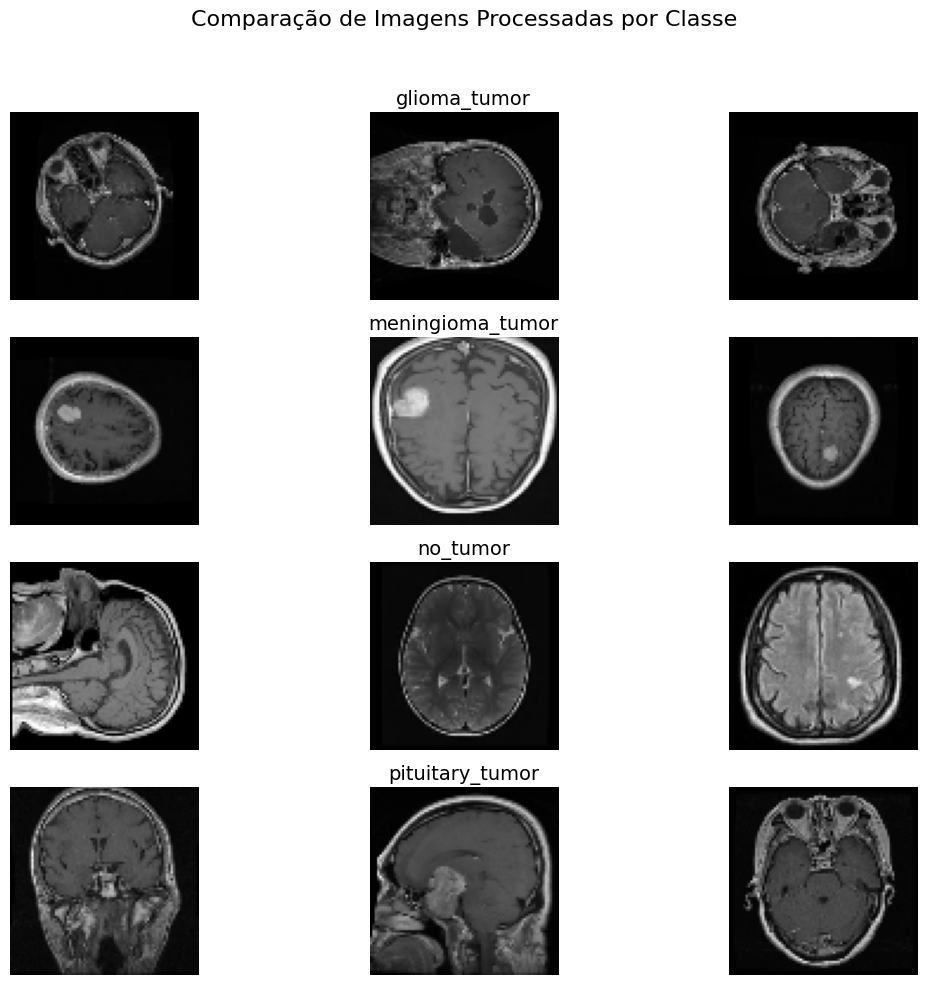

In [27]:
import os
import cv2
import random
import matplotlib.pyplot as plt

processed_data_dir = "MRI_PROCESSED/Training"

def load_images_from_class(class_path, num_images=3):
    images = []
    filenames = os.listdir(class_path)
    random.shuffle(filenames)
    for filename in filenames[:num_images]:
        filepath = os.path.join(class_path, filename)
        image = cv2.imread(filepath)
        if image is not None:
            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return images

classes_to_compare = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
images_to_display = []

for cls in classes_to_compare:
    class_path = os.path.join(processed_data_dir, cls)
    if os.path.exists(class_path):
        images = load_images_from_class(class_path, num_images=3)
        images_to_display.append((cls, images))

fig, axes = plt.subplots(len(images_to_display), 3, figsize=(12, 10))
fig.suptitle("Comparação de Imagens Processadas por Classe", fontsize=16)

for row, (cls_name, images) in enumerate(images_to_display):
    for col, image in enumerate(images):
        axes[row, col].imshow(image)
        axes[row, col].axis("off")
    axes[row, 1].set_title(cls_name, fontsize=14, pad=5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
